Reading logs from ../logs/V1
Classifying malicious_ransomwarePOC_10min_1.log as malicious, 13383 malicious entries found
Classifying malicious_ransomwarePOC_10min.log as malicious, 14477 malicious entries found


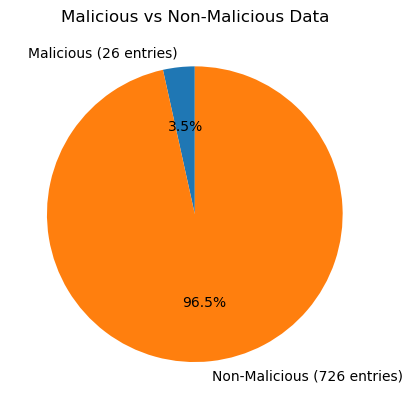

In [11]:
from log_reader import read_all_logs
from preprocessors.preprocessor import Preprocessor
from train_models import train_test_split_df
import matplotlib.pyplot as plt

df = read_all_logs(version=1)
df = Preprocessor.get(version=1).preprocess(df)
X_train, X_test, y_train, y_test = train_test_split_df(df)

# Count the number of malicious and non-malicious entries
malicious_count = y_test.sum()
non_malicious_count = len(X_test) - malicious_count

# Create labels and sizes for the pie chart
labels = [f'Malicious ({malicious_count} entries)', f'Non-Malicious ({non_malicious_count} entries)']
sizes = [malicious_count, non_malicious_count]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Malicious vs Non-Malicious Data')

# Display the chart
plt.show()


Best model: 
Model               NB
Scaler       Frequency
Min Ngram            6
Max Ngram            6
Score              1.0
Duration      0.011704
F1                 1.0
Name: 0, dtype: object


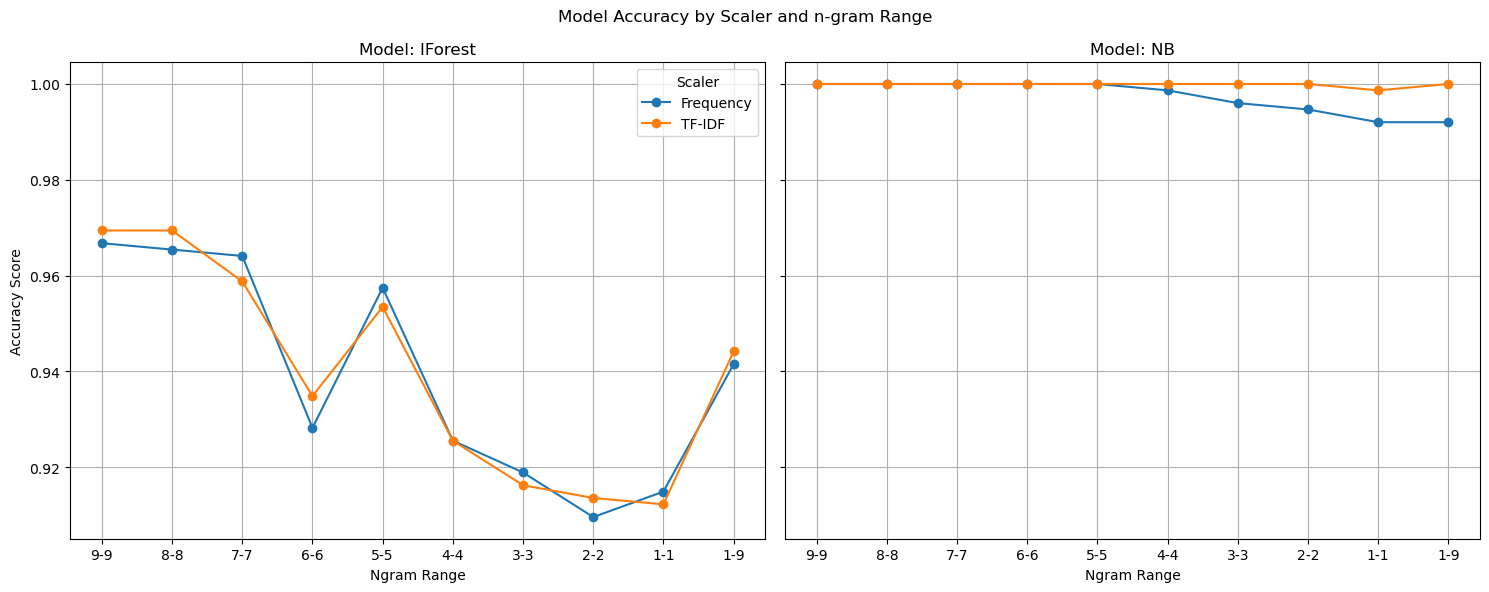

In [12]:
# V1 models evaluation results
from train_models import load_scores
import matplotlib.pyplot as plt
import os

# Load models
models_dir = os.path.join(os.getcwd(), 'models/trained')
model_score = load_scores(version=1, output_dir=models_dir)

# Create graph of accuracy per model
print("Best model: ")
print(model_score.iloc[0])

model_score = model_score.sort_values(['Min Ngram', 'Max Ngram'], ascending=[False, True])

# Create a figure with subplots for each model
models = model_score['Model'].unique()
models.sort()
fig, axs = plt.subplots(1, len(models), figsize=(15, 6), sharey=True) 

for ax, model in zip(axs, models):
    df_model = model_score[model_score['Model'] == model]
    for label, df_grouped in df_model.groupby('Scaler'):
        ax.plot(df_grouped['Min Ngram'].astype(str) + "-" + df_grouped['Max Ngram'].astype(str), 
                df_grouped['Score'], label=label, marker='o')
    ax.set_title(f'Model: {model}')
    ax.set_xlabel('Ngram Range')
    if ax == axs[0]:
        ax.set_ylabel('Accuracy Score')
        ax.legend(title='Scaler')
    ax.grid(True)

plt.suptitle('Model Accuracy by Scaler and n-gram Range')

plt.tight_layout()
plt.show()


Best model: 
Model               NB
Scaler       Frequency
Min Ngram            6
Max Ngram            6
Score              1.0
Duration      0.011704
F1                 1.0
Name: 0, dtype: object


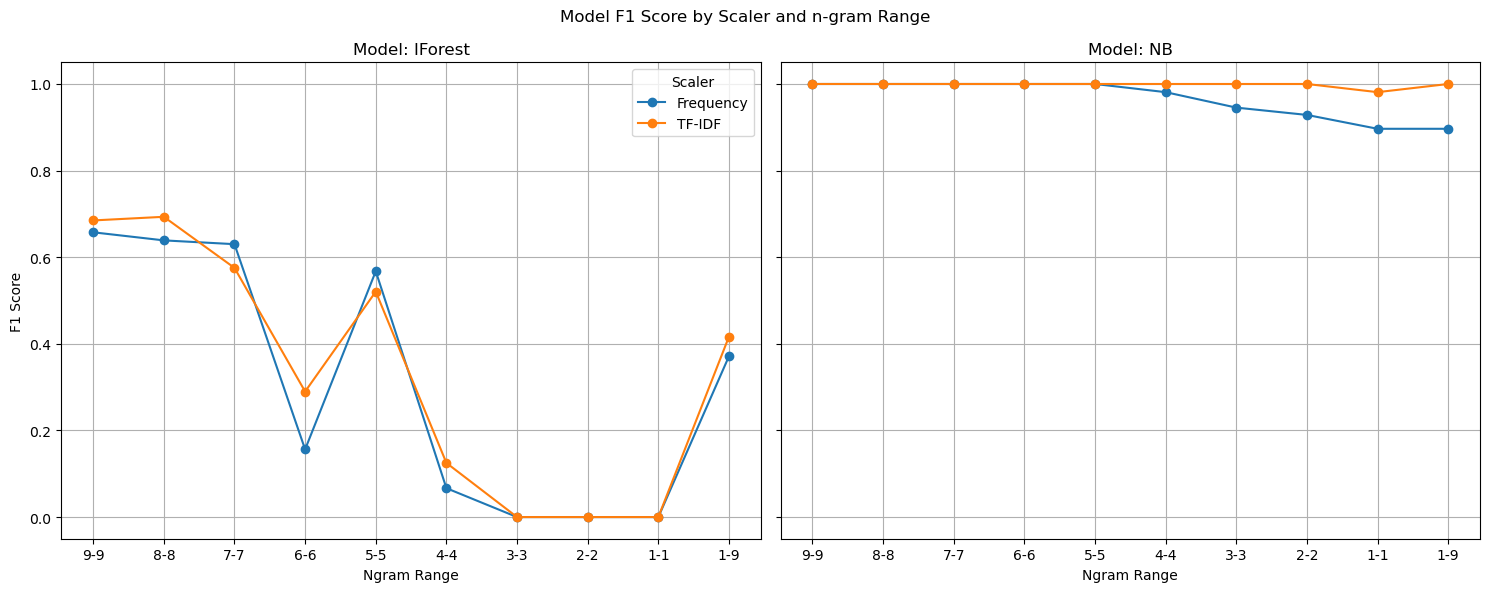

In [13]:
# V1 F1 models evaluation results
from train_models import load_scores
import matplotlib.pyplot as plt
import os

# Load model scores
models_dir = os.path.join(os.getcwd(), 'models/trained')
model_score = load_scores(version=1, output_dir=models_dir)

# Create graph of accuracy per model
print("Best model: ")
print(model_score.iloc[0])

model_score = model_score.sort_values(['Min Ngram', 'Max Ngram'], ascending=[False, True])

# Create a figure with subplots for each model
models = model_score['Model'].unique()
models.sort()
fig, axs = plt.subplots(1, len(models), figsize=(15, 6), sharey=True) 

for ax, model in zip(axs, models):
    df_model = model_score[model_score['Model'] == model]
    for label, df_grouped in df_model.groupby('Scaler'):
        ax.plot(df_grouped['Min Ngram'].astype(str) + "-" + df_grouped['Max Ngram'].astype(str), 
                df_grouped['F1'], label=label, marker='o')
    ax.set_title(f'Model: {model}')
    ax.set_xlabel('Ngram Range')
    if ax == axs[0]:
        ax.set_ylabel('F1 Score')
        ax.legend(title='Scaler')
    ax.grid(True)

plt.suptitle('Model F1 Score by Scaler and n-gram Range')

plt.tight_layout()
plt.show()


Reading logs from ../logs/V1
Classifying malicious_ransomwarePOC_10min_1.log as malicious, 13383 malicious entries found
Classifying malicious_ransomwarePOC_10min.log as malicious, 14477 malicious entries found


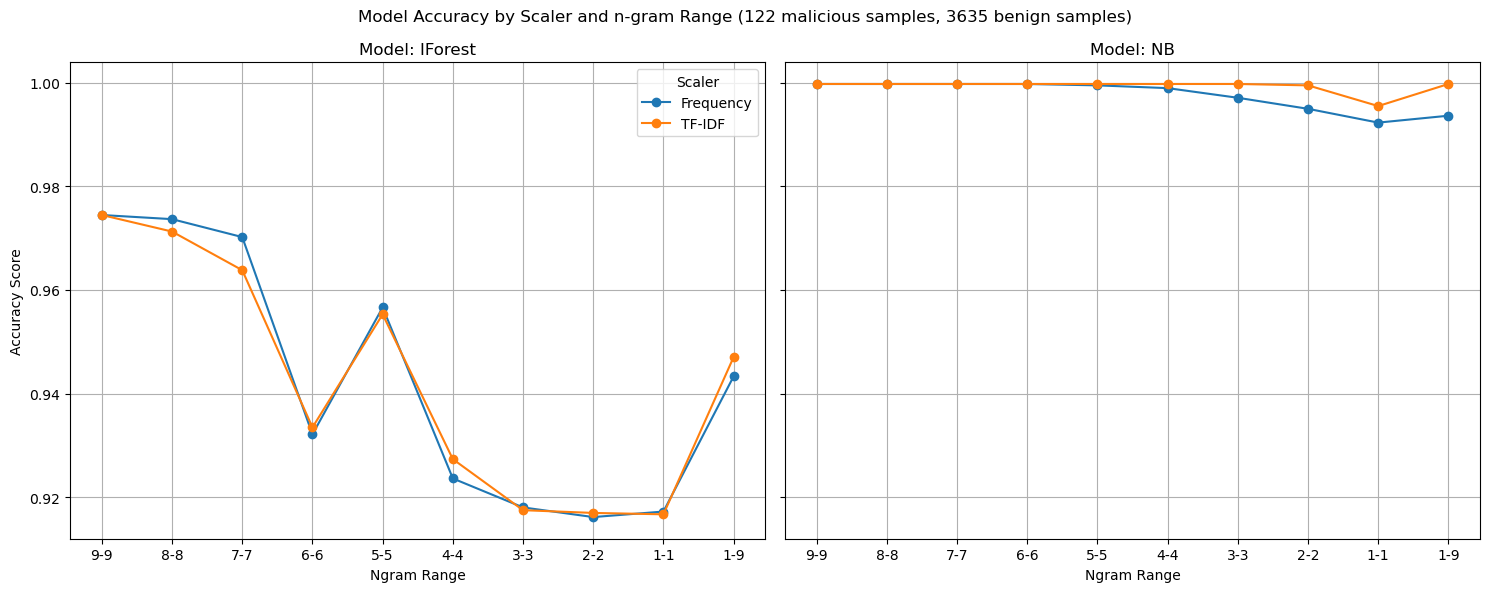

,Model,Score,Scaler,Min Ngram,Max Ngram
7,NB,0.999734,Frequency,9,9
1,NB,0.999734,TF-IDF,1,9
34,NB,0.999734,TF-IDF,9,9
4,NB,0.999734,Frequency,8,8
25,NB,0.999734,TF-IDF,8,8
38,NB,0.999734,TF-IDF,3,3
8,NB,0.999734,Frequency,7,7
19,NB,0.999734,TF-IDF,4,4
36,NB,0.999734,TF-IDF,5,5
35,NB,0.999734,TF-IDF,7,7


In [14]:
#V1 accuracy accross entire dataset
from train_models import load_model
from log_reader import read_all_logs
from preprocessors.preprocessor import Preprocessor
import matplotlib.pyplot as plt
import os
import pandas as pd

# Load models
models_dir = os.path.join(os.getcwd(), 'models/trained/v1')
model_files = [os.path.join(models_dir, file) for file in os.listdir(models_dir) if file.endswith('.pkl')]
models = [load_model(model_file) for model_file in model_files]

# Load data
df = read_all_logs(version=1)
preprocessor = Preprocessor.get(version=1)
df = preprocessor.preprocess(df)

nr_mal_samples = df['malicious'].sum()
nr_benign_samples = len(df) - nr_mal_samples

# Evaluate models
model_score = []
for model in models:
    score = model.get_score(df['syscall'], df['malicious'])
    model_score.append({'Model': model.get_model_type(), 'Score': score, 'Scaler': model.get_scaler_type(), 'Min Ngram': model.get_ngram_range()[0], 'Max Ngram': model.get_ngram_range()[1]})

# Create graph of accuracy per model
model_score = pd.DataFrame(model_score)
model_score = model_score.sort_values(['Min Ngram', 'Max Ngram'], ascending=[False, True])

models = model_score['Model'].unique()
models.sort()
fig, axs = plt.subplots(1, len(models), figsize=(15, 6), sharey=True) 

for ax, model in zip(axs, models):
    df_model = model_score[model_score['Model'] == model]
    for label, df_grouped in df_model.groupby('Scaler'):
        ax.plot(df_grouped['Min Ngram'].astype(str) + "-" + df_grouped['Max Ngram'].astype(str), 
                df_grouped['Score'], label=label, marker='o')
    ax.set_title(f'Model: {model}')
    ax.set_xlabel('Ngram Range')
    if ax == axs[0]:
        ax.set_ylabel('Accuracy Score')
        ax.legend(title='Scaler')
    ax.grid(True)

plt.suptitle(f'Model Accuracy by Scaler and n-gram Range ({nr_mal_samples} malicious samples, {nr_benign_samples} benign samples)')

plt.tight_layout()
plt.show()

model_score.sort_values('Score', ascending=False)

In [16]:
from train_models import load_model, train_test_split_df
from log_reader import read_all_logs
from preprocessors.preprocessor import Preprocessor
import matplotlib.pyplot as plt
import os
import pandas as pd

# Load models
ad = load_model('models/trained/v1/v1_IForest_TF-IDF_8_8.pkl')
classifier = load_model('models/trained/v1/v1_NB_TF-IDF_9_9.pkl')

# Load data
df = read_all_logs(version=1)
preprocessor = Preprocessor.get(version=1)
df = preprocessor.preprocess(df)

X_train, X_test, y_train, y_test = train_test_split_df(df)

# Evaluate models
ad_pred = ad.predict(X_test)
classifier_pred = classifier.predict(X_test)

scores = pd.DataFrame({'Actual': y_test, 'AD': ad_pred, 'Classifier': classifier_pred})
scores['AD_Accuracy'] = scores['AD'] - scores['Actual']
scores['Classifier_Accuracy'] = scores['Classifier'] - scores['Actual']

print(scores['AD_Accuracy'].value_counts())
print(scores['Classifier_Accuracy'].value_counts())


Reading logs from ../logs/V1
Classifying malicious_ransomwarePOC_10min_1.log as malicious, 13383 malicious entries found
Classifying malicious_ransomwarePOC_10min.log as malicious, 14477 malicious entries found
AD_Accuracy
0    729
1     23
Name: count, dtype: int64
Classifier_Accuracy
0    752
Name: count, dtype: int64
